In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
sizes = [5, 10, 100, 200, 400, 600, 800, 1000]

# Дискретное распределение

## Генерация выборок выбранных случайных величин

In [ ]:
def P(x):
  t = 1/13
  return -t**x/(np.log(1-t) * x)

In [ ]:
P(2)

0.03696251623225594

In [ ]:
def log_dist_model(u):
  m0 = 1
  s = 0
  while s <= u:
    s += P(m0)
    if s > u:
      return m0
    m0 += 1

In [ ]:
df_log = dict() # словарь, где ключ - объем выборки, значение - 5 выборок с логарифмическим распределением
for n in sizes:
  np.random.seed(99)
  df_uni = np.random.uniform(size=(5, n))# 5 выборок размера n
  df_log[n] = [[log_dist_model(u) for u in df_uni[i]] for i in range(5)]

In [ ]:
df_log[10]

[[1, 1, 1, 1, 1, 1, 1, 1, 2, 1],
 [1, 1, 1, 1, 1, 1, 2, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 2, 1, 1]]

## Построение эмпирической функции распределения

In [ ]:
def emp(df: list, x_lst: list): # Э.ф.р.
  return [np.sum(np.array(df) <= x) / len(df) for x in x_lst]

In [ ]:
emp(df_log[10][0], [1,2,3,4,5])

[0.9, 1.0, 1.0, 1.0, 1.0]

In [ ]:
def tdf(x_lst):
  res = []
  for x in x_lst:
    if x < 1:
      res.append(0)
    else:
      s = 0
      for k in range(1, int(x) + 1):
        s += 1 / (k * (13**k))
      s *= 1/np.log(13/12)
      res.append(s)
  return res

In [ ]:
tdf([-10, 1, 1.5, 1.9, 2, 2.5, 3])

[0,
 0.9610254220386545,
 0.9610254220386545,
 0.9610254220386545,
 0.9979879382709105,
 0.9979879382709105,
 0.9998834519238468]

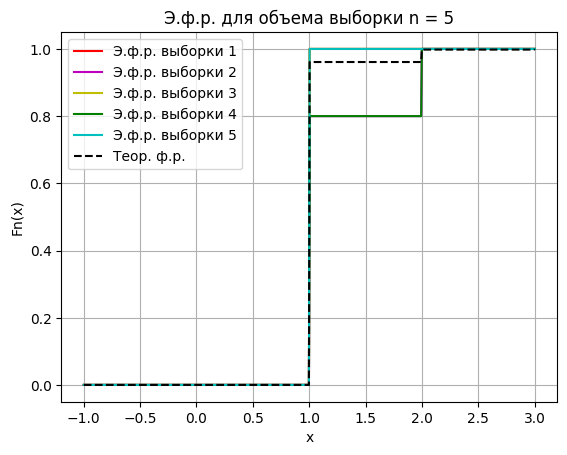

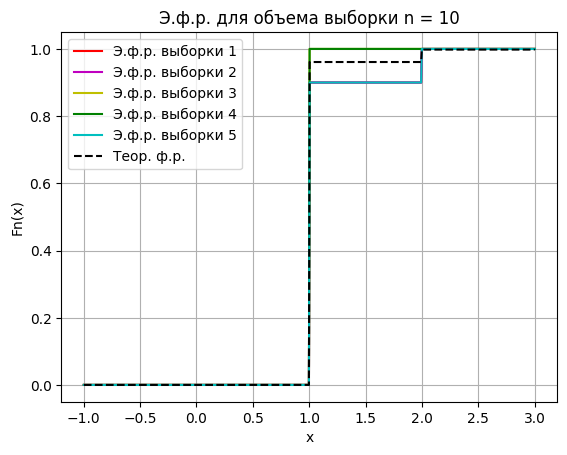

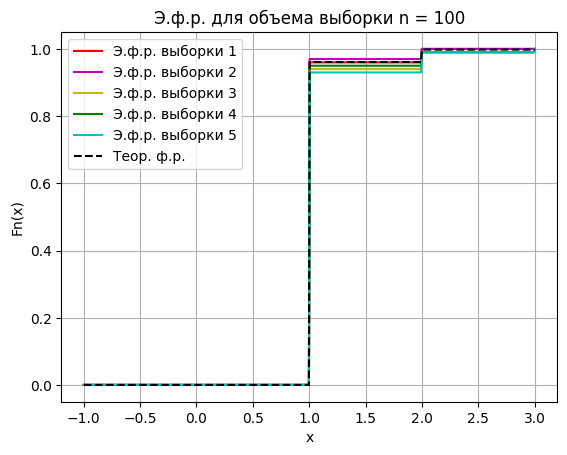

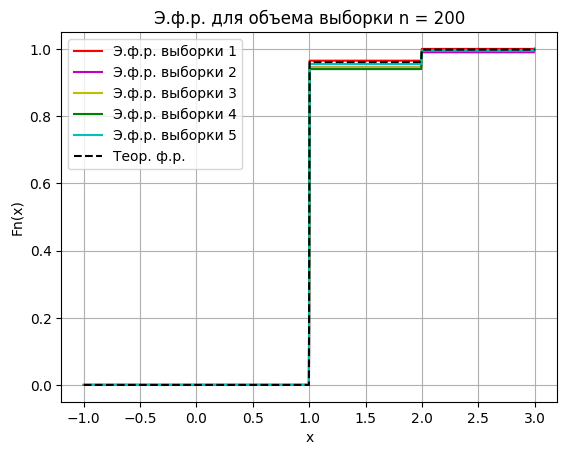

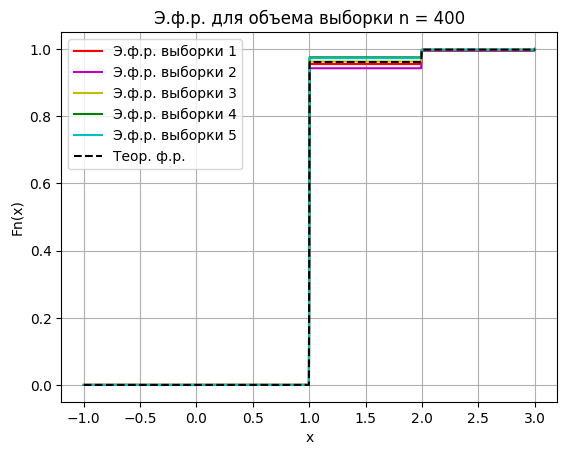

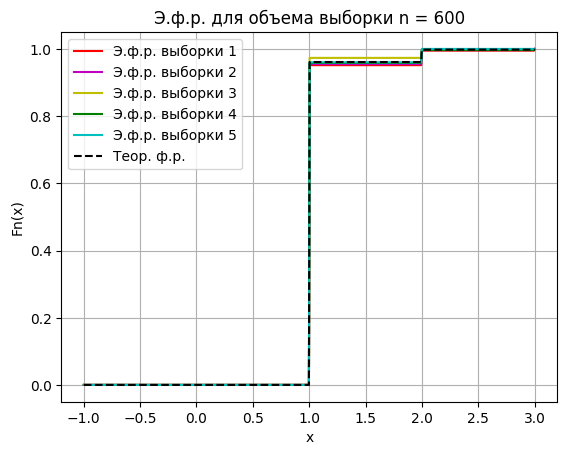

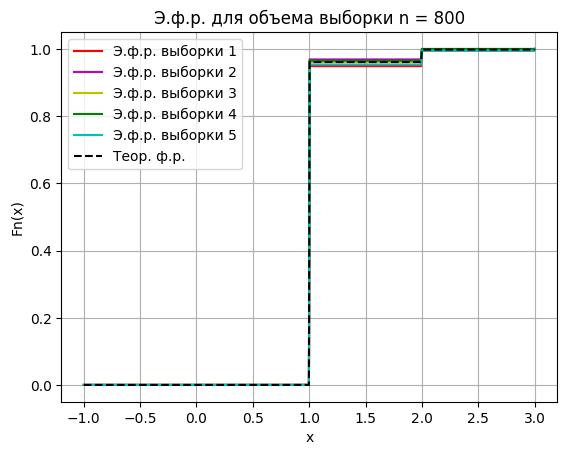

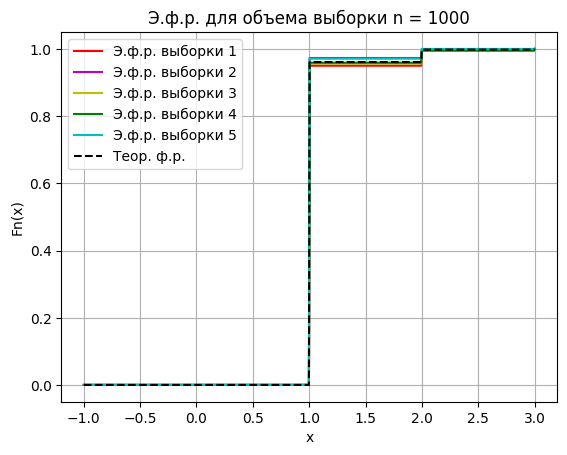

In [ ]:
for n in sizes:
  x = np.arange(-1, 3 + 2 * 3 / 100 * 0.1, 2 * 3 / 100 * 0.1)

  for i in range(5): # на одном графике отобразим э.ф.р. для 5 выборок одного объема
    plt.plot(x, emp(df_log[n][i], x), 'rmygc'[i])

  plt.plot(x, tdf(x), '--k')

  plt.legend(['Э.ф.р. выборки ' + str(i) for i in range(1, 6)] + ['Теор. ф.р.'])

  plt.grid(True)
  plt.xlabel('x')
  plt.ylabel('Fn(x)')
  plt.title(f'Э.ф.р. для объема выборки n = {n}')
  plt.show()

### $D_{m,n}$

In [ ]:
for n in sizes:
  for m in sizes:
      for i in range(5):
        for j in range(5):
          x_lst = df_log[n][i] + df_log[m][j] # будем рассматривать только те иксы, которые влияют на результат, т.е. те в которых есть переход на следующую ступеньку
          c = np.sqrt((n * m) / (n + m))
          differences = np.abs(np.array(emp(df_log[n][i], x_lst)) - np.array(emp(df_log[m][j], x_lst)))
          sup = np.max(differences)
          print(f'(n, m) = {n, m}' + (8 - len(str(n)) - len(str(m))) * ' ' + f' | (i, j) = {i, j} | D = {np.round(c * sup, 5)}')

(n, m) = (5, 5)       | (i, j) = (0, 0) | D = 0.0
(n, m) = (5, 5)       | (i, j) = (0, 1) | D = 0.31623
(n, m) = (5, 5)       | (i, j) = (0, 2) | D = 0.0
(n, m) = (5, 5)       | (i, j) = (0, 3) | D = 0.31623
(n, m) = (5, 5)       | (i, j) = (0, 4) | D = 0.0
(n, m) = (5, 5)       | (i, j) = (1, 0) | D = 0.31623
(n, m) = (5, 5)       | (i, j) = (1, 1) | D = 0.0
(n, m) = (5, 5)       | (i, j) = (1, 2) | D = 0.31623
(n, m) = (5, 5)       | (i, j) = (1, 3) | D = 0.0
(n, m) = (5, 5)       | (i, j) = (1, 4) | D = 0.31623
(n, m) = (5, 5)       | (i, j) = (2, 0) | D = 0.0
(n, m) = (5, 5)       | (i, j) = (2, 1) | D = 0.31623
(n, m) = (5, 5)       | (i, j) = (2, 2) | D = 0.0
(n, m) = (5, 5)       | (i, j) = (2, 3) | D = 0.31623
(n, m) = (5, 5)       | (i, j) = (2, 4) | D = 0.0
(n, m) = (5, 5)       | (i, j) = (3, 0) | D = 0.31623
(n, m) = (5, 5)       | (i, j) = (3, 1) | D = 0.0
(n, m) = (5, 5)       | (i, j) = (3, 2) | D = 0.31623
(n, m) = (5, 5)       | (i, j) = (3, 3) | D = 0.0
(n, m) = (5, 5

## Построение гистограммы и полигона частот

In [ ]:
df_log[10]

[[1, 1, 1, 1, 1, 1, 1, 1, 2, 1],
 [1, 1, 1, 1, 1, 1, 2, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 2, 1, 1]]

In [ ]:
n = 10
arr_uniq, arr_freq = np.unique(df_log[n][4], return_counts=True)
print(arr_uniq, arr_freq / n)

[1 2] [0.9 0.1]


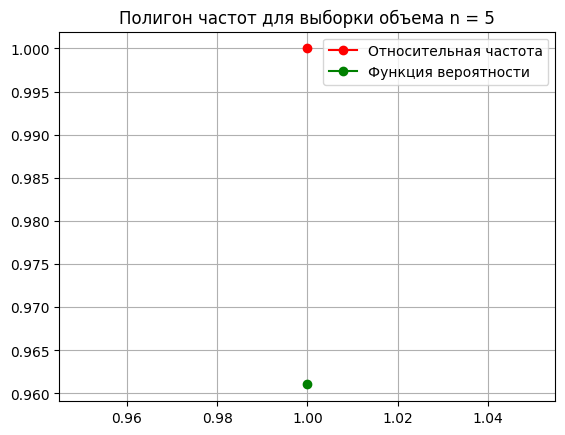

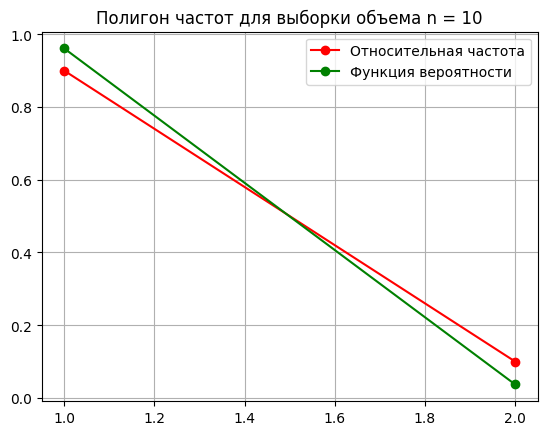

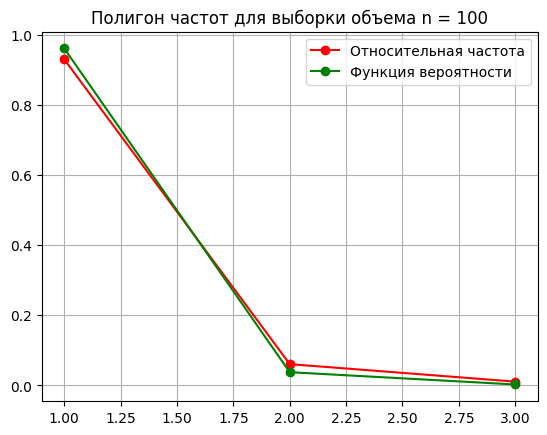

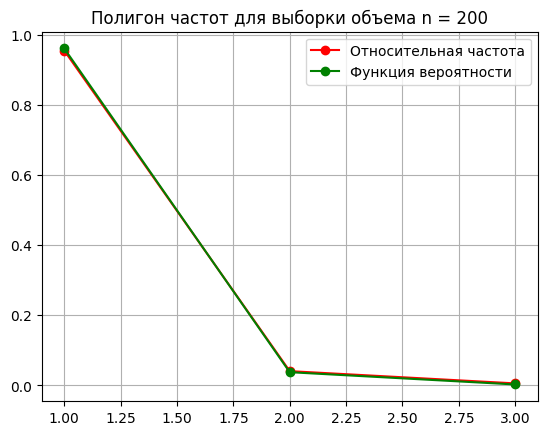

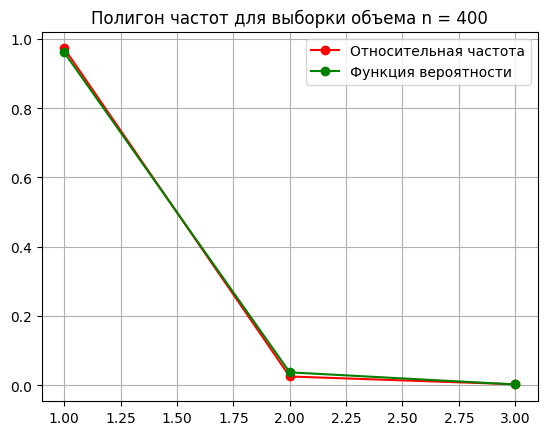

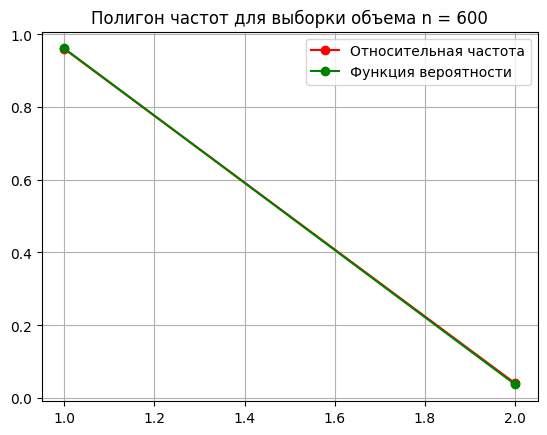

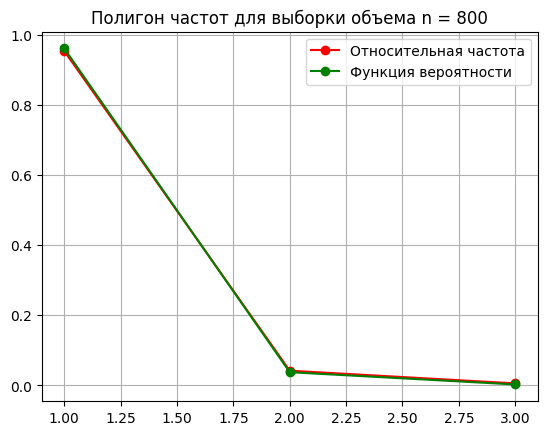

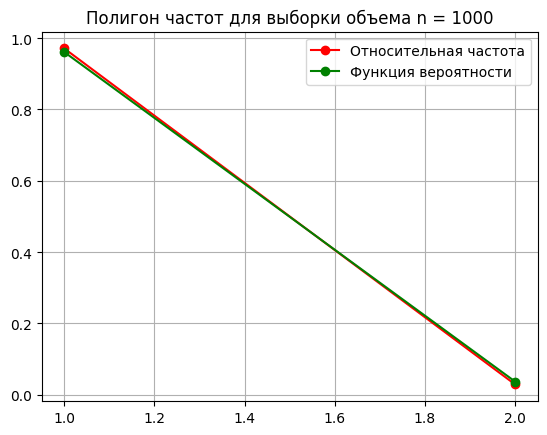

In [ ]:
for n in sizes:
  arr_uniq, arr_freq = np.unique(df_log[n][4], return_counts=True)
  plt.plot(arr_uniq, arr_freq / n, 'r', marker='o')
  plt.plot(arr_uniq, [P(x) for x in arr_uniq], 'g', marker='o')
  plt.grid(True)
  plt.legend(['Относительная частота', 'Функция вероятности'])
  plt.title(f'Полигон частот для выборки объема n = {n}')
  plt.show()

## Вычисление выборочных моментов

In [ ]:
glist = np.array(df_log[10][4])
df_log[10][4]

[1, 1, 1, 1, 1, 1, 1, 2, 1, 1]

In [ ]:
sample_av = glist.mean()
sample_var = np.mean((glist - sample_av)**2)

sample_av, sample_var

(1.1, 0.09)

In [ ]:
df_log[10]

[[1, 1, 1, 1, 1, 1, 1, 1, 2, 1],
 [1, 1, 1, 1, 1, 1, 2, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 2, 1, 1]]

In [ ]:
for n in sizes:
  for i in range(5):
    df = np.array(df_log[n][i])
    sample_av = df.mean()
    sample_var = np.mean((df - sample_av)**2)
    print(f'\item $(n, i) = {n, i}$ | $\overline{{X}} = {np.round(sample_av, 5)}$ | $\overline{{S}}^2 = {np.round(sample_var, 5)}$')

\item $(n, i) = (5, 0)$ | $\overline{X} = 1.0$ | $\overline{S}^2 = 0.0$
\item $(n, i) = (5, 1)$ | $\overline{X} = 1.2$ | $\overline{S}^2 = 0.16$
\item $(n, i) = (5, 2)$ | $\overline{X} = 1.0$ | $\overline{S}^2 = 0.0$
\item $(n, i) = (5, 3)$ | $\overline{X} = 1.2$ | $\overline{S}^2 = 0.16$
\item $(n, i) = (5, 4)$ | $\overline{X} = 1.0$ | $\overline{S}^2 = 0.0$
\item $(n, i) = (10, 0)$ | $\overline{X} = 1.1$ | $\overline{S}^2 = 0.09$
\item $(n, i) = (10, 1)$ | $\overline{X} = 1.1$ | $\overline{S}^2 = 0.09$
\item $(n, i) = (10, 2)$ | $\overline{X} = 1.0$ | $\overline{S}^2 = 0.0$
\item $(n, i) = (10, 3)$ | $\overline{X} = 1.0$ | $\overline{S}^2 = 0.0$
\item $(n, i) = (10, 4)$ | $\overline{X} = 1.1$ | $\overline{S}^2 = 0.09$
\item $(n, i) = (100, 0)$ | $\overline{X} = 1.04$ | $\overline{S}^2 = 0.0384$
\item $(n, i) = (100, 1)$ | $\overline{X} = 1.03$ | $\overline{S}^2 = 0.0291$
\item $(n, i) = (100, 2)$ | $\overline{X} = 1.07$ | $\overline{S}^2 = 0.0851$
\item $(n, i) = (100, 3)$ | $\overli

In [ ]:
Mxi = 1 /(12 * np.log(13/12))
Dxi = - (13 * np.log(12/13) + 1)/(144 * (np.log(12/13))**2)
Mxi, Dxi

(1.041110873875209, 0.04395826166360854)

In [ ]:
for n in sizes:
  for i in range(5):
    df = np.array(df_log[n][i])
    sample_av = df.mean()
    sample_var = np.mean((df - sample_av)**2)
    print(f'\item $(n, i) = {n, i} \\Rightarrow |\overline{{X}} - M\\xi| = {np.round(np.abs(sample_av - Mxi), 5)}$; |$\overline{{S}}^2 - D\\xi| = {np.round(np.abs(sample_var - Dxi), 5)}$')

\item $(n, i) = (5, 0) \Rightarrow |\overline{X} - M\xi| = 0.04111$; |$\overline{S}^2 - D\xi| = 0.04396$
\item $(n, i) = (5, 1) \Rightarrow |\overline{X} - M\xi| = 0.15889$; |$\overline{S}^2 - D\xi| = 0.11604$
\item $(n, i) = (5, 2) \Rightarrow |\overline{X} - M\xi| = 0.04111$; |$\overline{S}^2 - D\xi| = 0.04396$
\item $(n, i) = (5, 3) \Rightarrow |\overline{X} - M\xi| = 0.15889$; |$\overline{S}^2 - D\xi| = 0.11604$
\item $(n, i) = (5, 4) \Rightarrow |\overline{X} - M\xi| = 0.04111$; |$\overline{S}^2 - D\xi| = 0.04396$
\item $(n, i) = (10, 0) \Rightarrow |\overline{X} - M\xi| = 0.05889$; |$\overline{S}^2 - D\xi| = 0.04604$
\item $(n, i) = (10, 1) \Rightarrow |\overline{X} - M\xi| = 0.05889$; |$\overline{S}^2 - D\xi| = 0.04604$
\item $(n, i) = (10, 2) \Rightarrow |\overline{X} - M\xi| = 0.04111$; |$\overline{S}^2 - D\xi| = 0.04396$
\item $(n, i) = (10, 3) \Rightarrow |\overline{X} - M\xi| = 0.04111$; |$\overline{S}^2 - D\xi| = 0.04396$
\item $(n, i) = (10, 4) \Rightarrow |\overline{X} -

# Доп

In [ ]:
def plot_hist(n, n_bins):
    if n != 5:
      len_interval = (max(df_log[n][4]) - min(df_log[n][4])) / n_bins
      h = plt.hist(df_log[n][4], bins = n_bins, weights = [1 / (n * len_interval)] * n, color = 'g')
      assert(np.abs(h[1][1] - h[1][0] - len_interval) < 0.0001) # длина интервала
    else:
      len_interval = 1
      h = plt.hist(df_log[n][4], bins = n_bins, weights = [1 / n] * n,color = 'g')


    plt.plot(np.unique(df_log[n][4]), [P(x) for x in np.unique(df_log[n][4])], 'k', marker = 'o')
    #plt.plot(h[1][:-1] + len_interval / 2, h[0], 'r', marker = 'o')

    plt.grid(True)
    #plt.legend(['Функция вероятности', 'Полигон частот',  'Гистограмма частот'])
    plt.legend(['Функция вероятности',  'Гистограмма частот'])
    plt.title(f'Гистограмма частот для выборки объема n = {n}')
    plt.show()

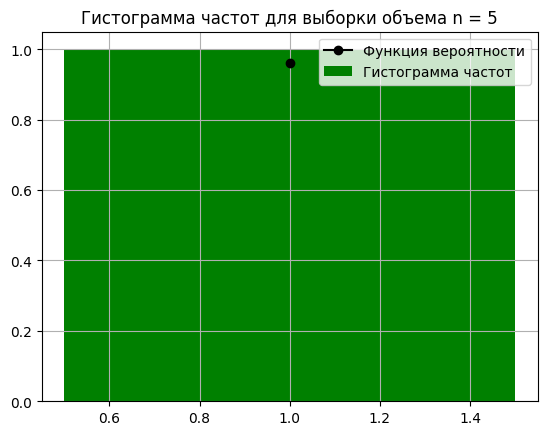

In [ ]:
plot_hist(5, 1)

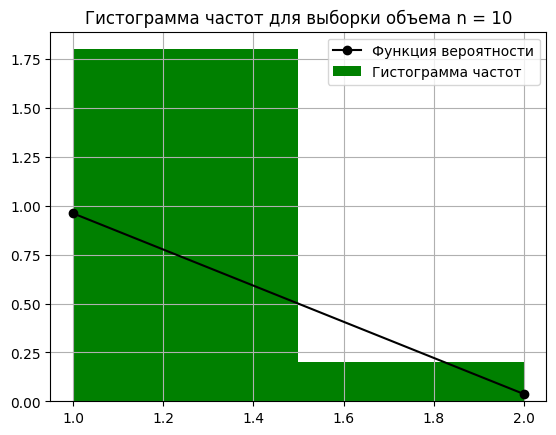

In [ ]:
plot_hist(10, 2)

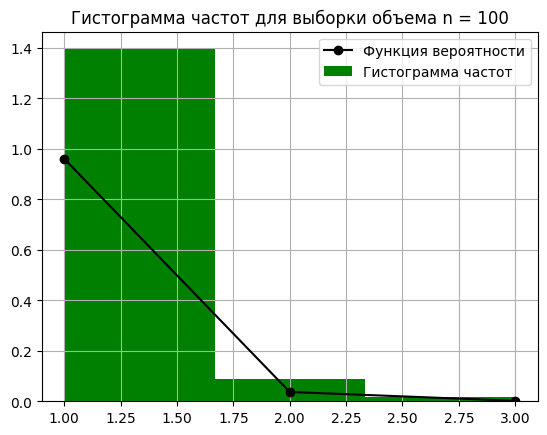

In [ ]:
plot_hist(100, 3)

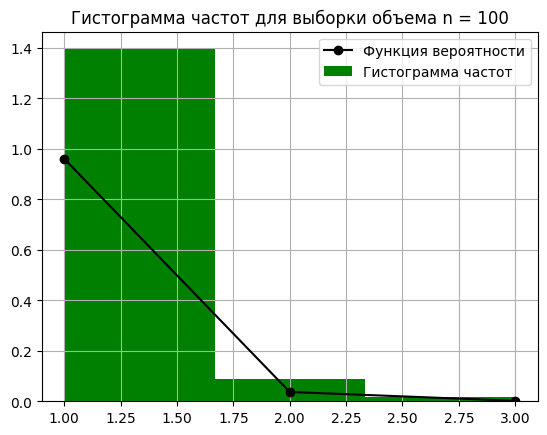

In [ ]:
plot_hist(100, 3)

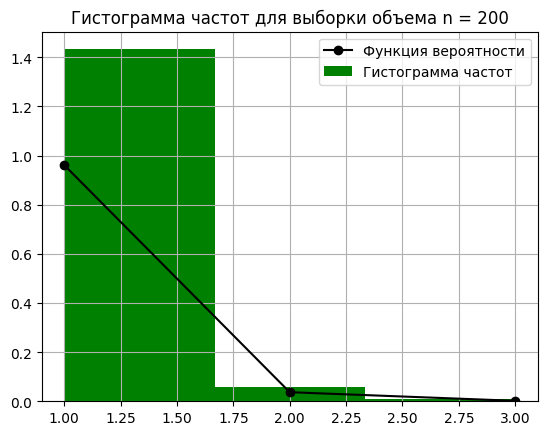

In [ ]:
plot_hist(200, 3)

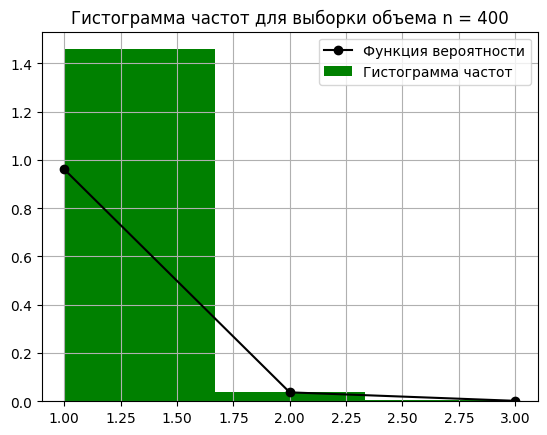

In [ ]:
plot_hist(400, 3)

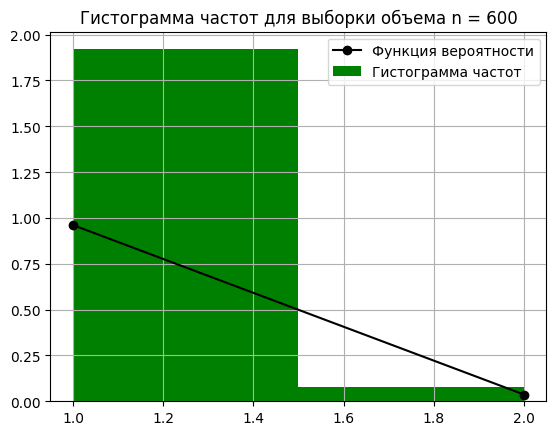

In [ ]:
plot_hist(600, 2)

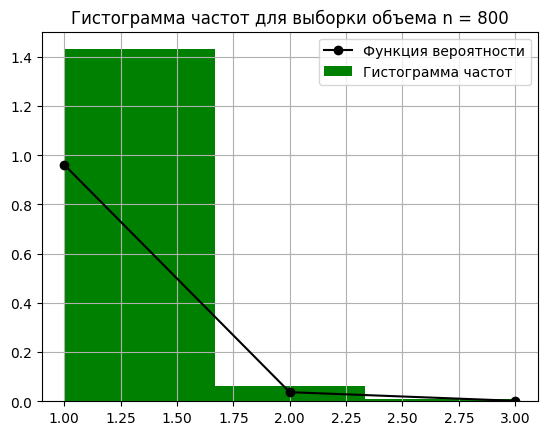

In [ ]:
plot_hist(800, 3)

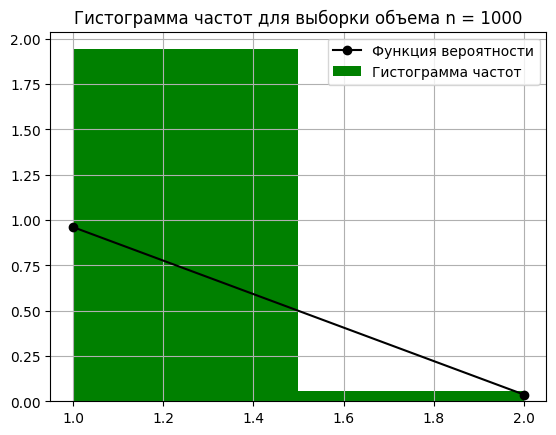

In [ ]:
plot_hist(1000, 2)

# ДЗ 3

## Метод моментов

In [ ]:
t = 1/13
left = t / ((np.log(1-t))*(1-t))

In [ ]:
np.round(left, 5)

-1.04111

In [ ]:
for n in sizes:
  for i in range(5):
    df = np.array(df_log[n][i])
    right = - df.mean()
    print(f'\item $(n, i) = {n, i}$ | $-\hat{{\\alpha_1}} = {np.round(right, 5)}$ | Абс. разница $= {np.round(np.abs(left - right), 5)}$')

\item $(n, i) = (5, 0)$ | $-\hat{\alpha_1} = -1.0$ | Абс. разница $= 0.04111$
\item $(n, i) = (5, 1)$ | $-\hat{\alpha_1} = -1.2$ | Абс. разница $= 0.15889$
\item $(n, i) = (5, 2)$ | $-\hat{\alpha_1} = -1.0$ | Абс. разница $= 0.04111$
\item $(n, i) = (5, 3)$ | $-\hat{\alpha_1} = -1.2$ | Абс. разница $= 0.15889$
\item $(n, i) = (5, 4)$ | $-\hat{\alpha_1} = -1.0$ | Абс. разница $= 0.04111$
\item $(n, i) = (10, 0)$ | $-\hat{\alpha_1} = -1.1$ | Абс. разница $= 0.05889$
\item $(n, i) = (10, 1)$ | $-\hat{\alpha_1} = -1.1$ | Абс. разница $= 0.05889$
\item $(n, i) = (10, 2)$ | $-\hat{\alpha_1} = -1.0$ | Абс. разница $= 0.04111$
\item $(n, i) = (10, 3)$ | $-\hat{\alpha_1} = -1.0$ | Абс. разница $= 0.04111$
\item $(n, i) = (10, 4)$ | $-\hat{\alpha_1} = -1.1$ | Абс. разница $= 0.05889$
\item $(n, i) = (100, 0)$ | $-\hat{\alpha_1} = -1.04$ | Абс. разница $= 0.00111$
\item $(n, i) = (100, 1)$ | $-\hat{\alpha_1} = -1.03$ | Абс. разница $= 0.01111$
\item $(n, i) = (100, 2)$ | $-\hat{\alpha_1} = -1.07$

## Оптимальные оценки

In [ ]:
tau = - t / ((np.log(1-t))*(1-t))

In [ ]:
for n in sizes:
  for i in range(5):
    df = np.array(df_log[n][i])
    sample_av = df.mean()
    print(f'\item $(n, i) = {n, i}$ | $\\overline{{X}} = {np.round(sample_av, 5)}$ | Абс. разница $= {np.round(np.abs(sample_av - tau), 5)}$')

\item $(n, i) = (5, 0)$ | $\overline{X} = 1.0$ | Абс. разница $= 0.04111$
\item $(n, i) = (5, 1)$ | $\overline{X} = 1.2$ | Абс. разница $= 0.15889$
\item $(n, i) = (5, 2)$ | $\overline{X} = 1.0$ | Абс. разница $= 0.04111$
\item $(n, i) = (5, 3)$ | $\overline{X} = 1.2$ | Абс. разница $= 0.15889$
\item $(n, i) = (5, 4)$ | $\overline{X} = 1.0$ | Абс. разница $= 0.04111$
\item $(n, i) = (10, 0)$ | $\overline{X} = 1.1$ | Абс. разница $= 0.05889$
\item $(n, i) = (10, 1)$ | $\overline{X} = 1.1$ | Абс. разница $= 0.05889$
\item $(n, i) = (10, 2)$ | $\overline{X} = 1.0$ | Абс. разница $= 0.04111$
\item $(n, i) = (10, 3)$ | $\overline{X} = 1.0$ | Абс. разница $= 0.04111$
\item $(n, i) = (10, 4)$ | $\overline{X} = 1.1$ | Абс. разница $= 0.05889$
\item $(n, i) = (100, 0)$ | $\overline{X} = 1.04$ | Абс. разница $= 0.00111$
\item $(n, i) = (100, 1)$ | $\overline{X} = 1.03$ | Абс. разница $= 0.01111$
\item $(n, i) = (100, 2)$ | $\overline{X} = 1.07$ | Абс. разница $= 0.02889$
\item $(n, i) = (100, 3)

In [ ]:
tau

1.0411108738752088

## Работа с данными

In [ ]:
'''a = 1/13
s = np.random.default_rng().logseries(a, 10000) # в парето длинный хвост и высокий клюв
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s)

def logseries(k, p):
    return -p**k/(k*np.log(1-p))
plt.plot(bins, logseries(bins, a) * count.max()/
         logseries(bins, a).max(), 'r')
plt.show()'''

"a = 1/13\ns = np.random.default_rng().logseries(a, 10000) # в парето длинный хвост и высокий клюв\nimport matplotlib.pyplot as plt\ncount, bins, ignored = plt.hist(s)\n\ndef logseries(k, p):\n    return -p**k/(k*np.log(1-p))\nplt.plot(bins, logseries(bins, a) * count.max()/\n         logseries(bins, a).max(), 'r')\nplt.show()"

In [ ]:
data = pd.read_csv("games.csv")
data.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


In [ ]:
data.shape

(50872, 13)

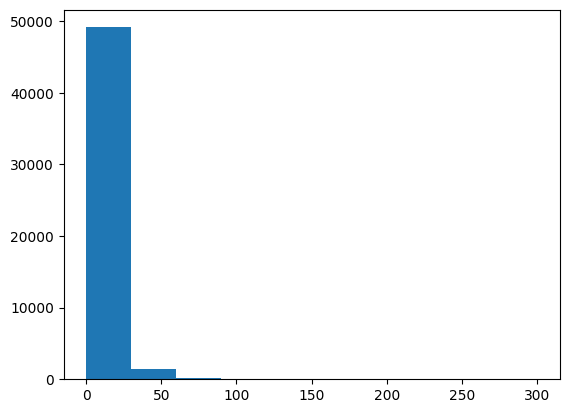

In [ ]:
plt.hist(data.price_final)
plt.show()

In [ ]:
df = np.round(np.array(data.price_final))
sample_av = df.mean()
sample_var = np.mean((df - sample_av)**2)
print(f'$\overline{{X}} = {np.round(sample_av, 5)}$; $\overline{{S}}^2 = {np.round(sample_var, 5)}$')

$\overline{X} = 8.61442$; $\overline{S}^2 = 132.75303$


In [ ]:
from math import log
import scipy.optimize


def func(x):
    y = x / (log(1-x) * (1-x)) + sample_av
    return y

y = scipy.optimize.fsolve(func, 0.96)
print(y)

[0.96712557]


In [ ]:
np.round(y[0],5)

0.96713

In [ ]:
def tdf(x_lst, t):
  res = []
  for x in x_lst:
    if x < 1:
      res.append(0)
    else:
      s = 0
      for k in range(1, int(x) + 1):
        s += t**k / k
      s *= -1/np.log(1-t)
      res.append(s)
  return res

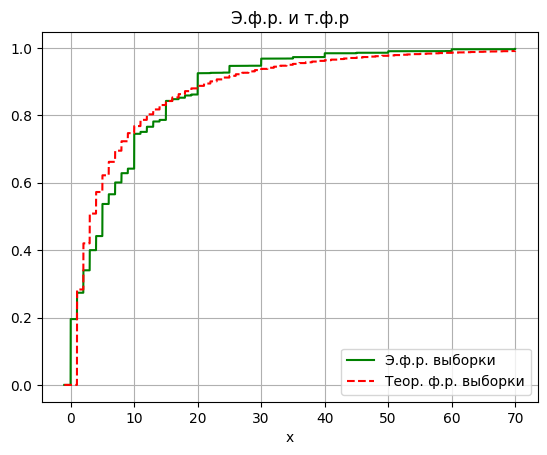

In [ ]:
x = np.linspace(-1, 70, 10000)
plt.plot(x, emp(df, x), 'g')
plt.plot(x, tdf(x, y[0]), '--r')
plt.legend(['Э.ф.р. выборки', 'Теор. ф.р. выборки'])
plt.grid(True)
plt.xlabel('x')
# plt.ylabel('Fn(x)')
plt.title(f'Э.ф.р. и т.ф.р')
plt.show()

# ДЗ 4